# 2. (20 points) Open-Loop Control

In [1]:
from control import ackerman_kin, skid_steer_kin
import matplotlib.pyplot as plt
import math

W = 3.048  # 10ft in meters, width of vehicle
L = 10.668  # 35ft in meters, length of vehicle

#### (a) (5 points) Make a list of commands (at 2Hz) that will allow this robot to traverse along the edge of an 18m radius circle. The robot starts off in the center of the circle (0,0). Plot the resulting path (x, y) and trajectory (x, y, and angular velocities). Assume a constant velocity of 8m/s.

Answer: 

Below is detailed a code mockup of the commands that should be issued. Starting the vehile in the center of the circle, We choose an inital alpha angle for the ackerman steering that aims to drive a circle of halve the target radius. Using the predetermined equations/functions for movement, it updates every 2Hz checking if it has reached the edge of the circle (based on its math) and switches to a new aplha angle for the radius of the whole circle.

In [2]:
R = 18  # Radius of the circcle
ALPHA_TARGET = math.atan(L/R) # Alpha that will move the car in a circle of radius R

alpha = math.atan(L/(R/2)) # Start with alpha that will make a circle of R/2
v = 8
dt = .5
x_real = [0]
y_real = [0]
theta_real = [0]
t = [0]
omega = [0]

steps = 35
for i in range(steps):
    x_new, y_new, theta_new = ackerman_kin(v, x_real[i], y_real[i], alpha, theta_real[i], dt)
    x_real.append(x_new)
    y_real.append(y_new)
    theta_real.append(theta_new)
    t.append(t[i] + dt)
    r = math.sqrt(x_new**2 + y_new**2)
    omega.append(v/r)
    
    # When car reaches the edge change alpha to 
    if r >= R:
        alpha = ALPHA_TARGET


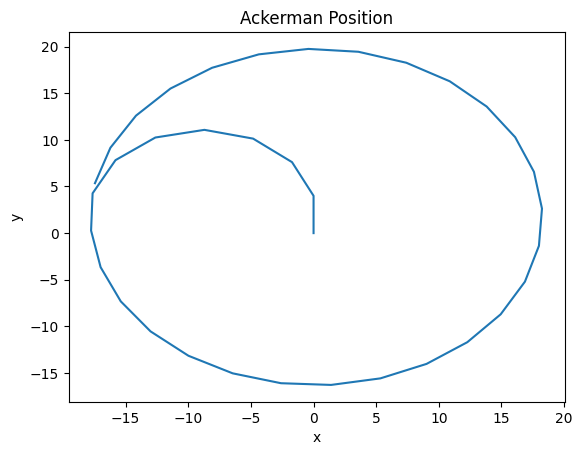

In [3]:
# Plots of Ackerman Position
plt.plot(x_real, y_real)
plt.title("Ackerman Position")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

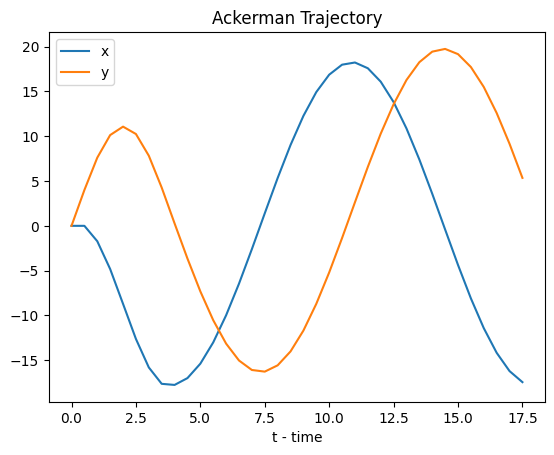

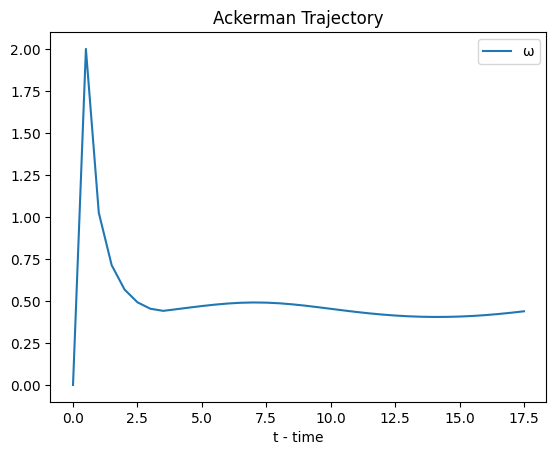

In [4]:
# Plots of ackerman trajectory
plt.plot(t, x_real, label="x")
plt.plot(t, y_real, label="y")
plt.xlabel("t - time")
plt.title("Ackerman Trajectory")
plt.legend()
plt.show()

plt.plot(t,omega, label="\u03C9")
plt.title("Ackerman Trajectory")
plt.xlabel("t - time")
plt.legend()
plt.show()

# (b) (5 points) Do the same as the above for an equivalent skid-steer vehicle.

Answer:

Same as part a, following the same steps but instead of assigning an initial and target alpha, from the derived equiations for v_left and v_right we choose the appropriate velocities to drive in the half then full circle.

In [5]:
R = 18  # Radius of the circcle
V = 8 # Average veloocity between wheels

# Velocities for diving circle of radius R
V_LEFT = V - (V*W)/(2 * R) 
V_RIGHT = 2 * V - V_LEFT

# Initial try to make circle of R/2
v_left = V - (V*W)/(R)
v_right = 2 * V - v_left
dt = .5
x_real = [0]
y_real = [0]
theta_real = [0]
t = [0]
omega = [0]

steps = 35
for i in range(steps):
    x_new, y_new, theta_new = skid_steer_kin(v_left, v_right, x_real[i], y_real[i], theta_real[i], dt)
    x_real.append(x_new)
    y_real.append(y_new)
    theta_real.append(theta_new)
    t.append(t[i] + dt)
    r = math.sqrt(x_new**2 + y_new**2)
    omega.append(((v_left+v_right)/2)/r)
    
    # When car reaches the edge change alpha to 
    if r >= R:
        v_left = V_LEFT
        v_right = V_RIGHT


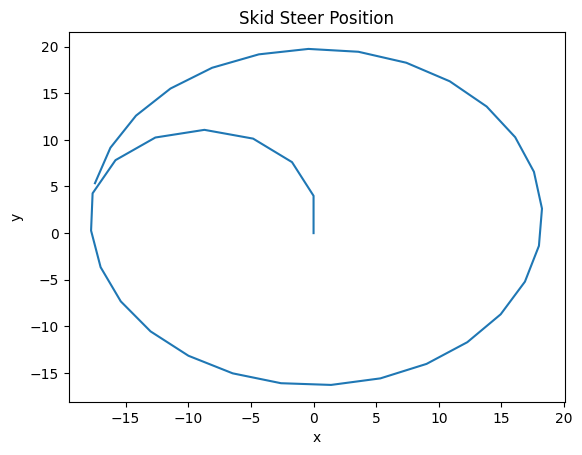

In [6]:
# Plot oof Skid Steer Position
plt.plot(x_real, y_real)
plt.title("Skid Steer Position")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

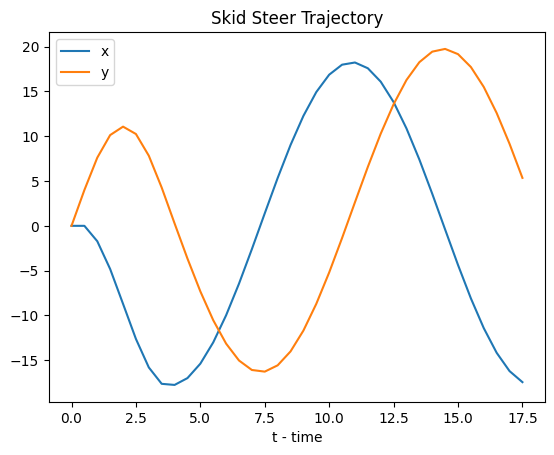

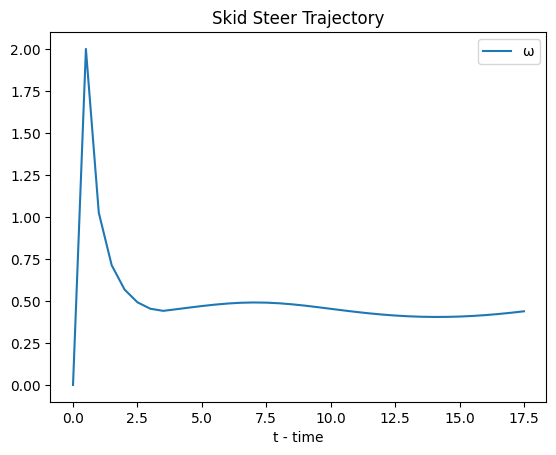

In [7]:
# Plots of skid steer trajectory
plt.plot(t, x_real, label="x")
plt.plot(t, y_real, label="y")
plt.xlabel("t - time")
plt.title("Skid Steer Trajectory")
plt.legend()
plt.show()

plt.plot(t,omega, label="\u03C9")
plt.title("Skid Steer Trajectory")
plt.xlabel("t - time")
plt.legend()
plt.show()

# (c) (10 points) 

### Your Skid Steer vehicle (with the same dimensions as described for the skid steer), is driving on a circle of radius 9m. Assume that you begin on the edge of the circle. Calculate the positional error with our computational approximation using the forward Euler method, as referred to in the course notes and illustrated in Reading 2, eq. 1.6. Graph the errors and computing time for three different time-steps (∆t = 1, 0.1, 0.01), error is defined as the absolute distance between the expected (from equations) to real x, y position (defined analytically) over time.

Brief notes on what this problem is about: Imagine that you are moving a semi-truck and you have GPS positions (somewhat accurate) and an internal prediction model. We want the internal models to be updated based on ”ground truth” information to build better estimates of the vehicle motion over time.

Answer:

Starting at the edge of the circle we set v_left and v_right to go in a circle of raddius 9 meters, we compare the position of the vehicle to the expected actual position based on the projected constant angular velocity Omega. Essentially we are comparing the calculated position of the vehicle to traversal around the circle assuming the constant velocity. Since we are assuming a constant velocity on both the part of the vehicle and the expected path we can simplify the Euler Method by Theta = Theta_0 + Omega * dt, X = cos(Theta_0), Y = sin(Theta_0).

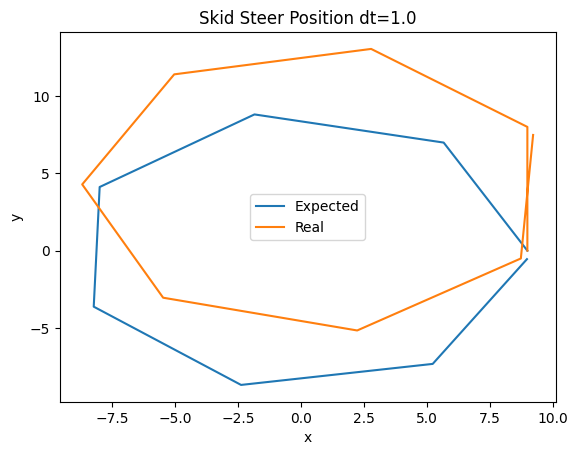

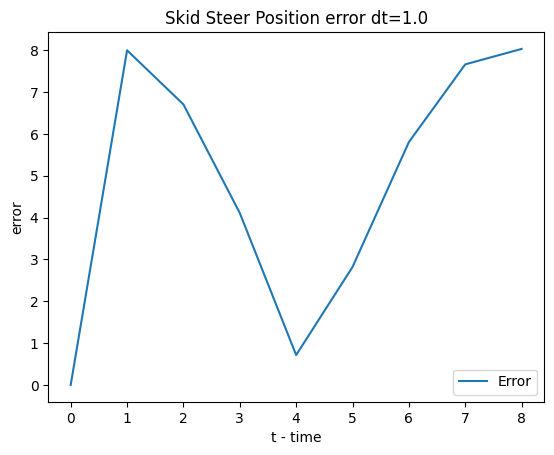

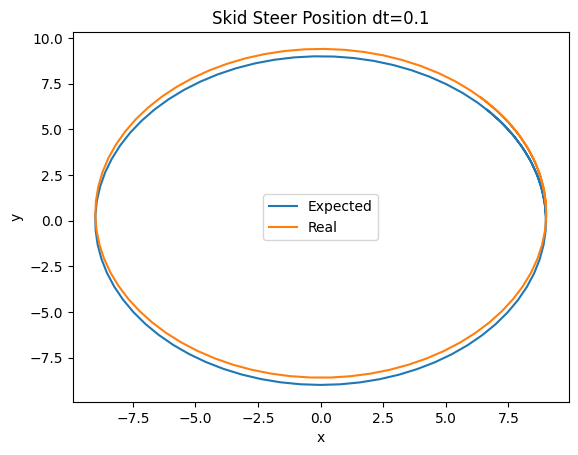

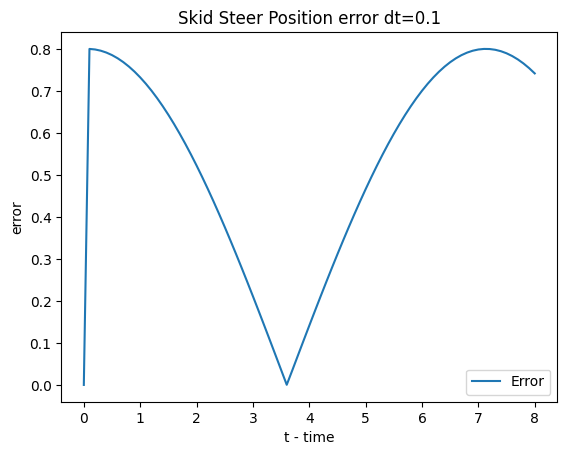

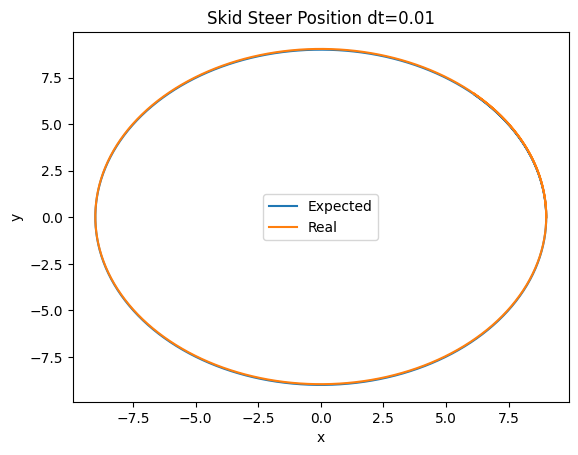

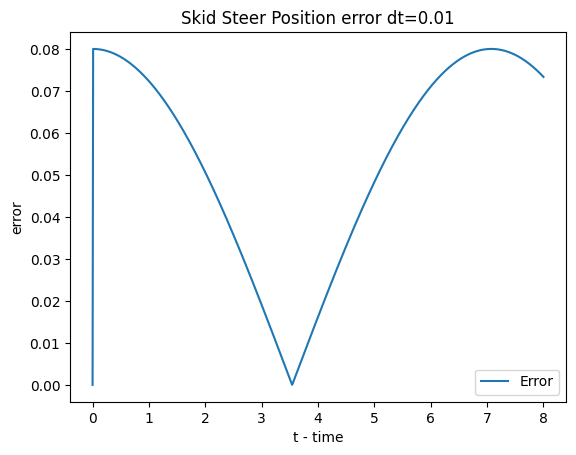

In [8]:
DT = [1.0, 0.1, 0.01]
R = 9.0  # Radius of the circcle
V = 8.0 # Average veloocity between wheels
OMEGA = V / R  # Angular Velocity, used to derive the expected position conidering a true constant velocity

# Respective v_left and v_right to drive in a circel of radius R
V_LEFT = V - (V*W)/(2 * R)
V_RIGHT = 2 * V - V_LEFT 


for dt in DT:
    steps = int(8 * 1/dt) # Dynamically assigns the number of steps to complete a full circle

    x_real = [R]
    x_ex = [R]
    
    y_real = [0.0]
    y_ex = [0.0]

    error = []

    theta_real = [0.0]
    theta_ex = [0.0]
    t = [0.0]
    
    for i in range(steps):
        x_new, y_new, theta_new = skid_steer_kin(V_LEFT, V_RIGHT, x_real[i], y_real[i], theta_real[i], dt)
        x_real.append(x_new)
        y_real.append(y_new)
        theta_real.append(theta_new)
        
        # Calculate the expected values based on constant velocity and previous expected theta, follows the circle according to 
        # constant angular velocity
        x_ex.append(R * math.cos(theta_ex[i]))
        y_ex.append(R * math.sin(theta_ex[i]))
        theta_ex.append(theta_ex[i] + OMEGA * dt)

        t.append(t[i] + dt)

        error.append(math.sqrt(pow(abs(x_real[i] - x_ex[i]), 2) + pow(abs(y_real[i] - y_ex[i]), 2)))
        
    error.append(math.sqrt(pow(abs(x_real[steps] - x_ex[steps]), 2) + pow(abs(y_real[steps] - y_ex[steps]), 2)))

    plt.plot(x_ex, y_ex, label="Expected")
    print()
    plt.plot(x_real, y_real, label="Real")
    plt.title("Skid Steer Position dt=" + str(dt))
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    plt.plot(t, error, label="Error")
    plt.title("Skid Steer Position error dt=" + str(dt))
    plt.legend()
    plt.xlabel("t - time")
    plt.ylabel("error")
    plt.show()
